In [35]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from fbprophet import Prophet
import datetime
from flask import Flask, render_template
from flask import request, redirect
from pathlib import Path
import os
import os.path
import csv
from itertools import zip_longest
from sklearn.preprocessing import MinMaxScaler
import import_ipynb
from train import *

In [2]:
def yahoo_stock_price(symbol, start, end):
    return web.DataReader(symbol, 'yahoo', start, end)

In [38]:
def get_historical_stock_price(stock):
    startDate = datetime.date(2020,2,1)
    endDate = datetime.date(2020,6,7)
    stockData = yahoo_stock_price(stock, startDate, endDate)
    return stockData

In [41]:
stock = get_historical_stock_price('GOOGL')

In [42]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,1469.670044,1427.060059,1467.859985,1432.780029,2191100,1432.780029
2020-02-03,1486.300049,1456.609985,1461.650024,1482.599976,3608800,1482.599976
2020-02-04,1467.339966,1422.030029,1454.489990,1445.410034,4794000,1445.410034
2020-02-05,1464.579956,1429.680054,1463.609985,1446.050049,1818800,1446.050049
2020-02-06,1481.560059,1450.479980,1451.979980,1475.969971,1891100,1475.969971


In [52]:
def data_preprocess(data):
     train_cols = ["Open","High","Low","Close","Volume"]
     x = data.loc[:, train_cols].values
    #  print(x)
     min_max_scaler = MinMaxScaler()
     x = min_max_scaler.fit_transform(x)
     x_t, y_t = build_timeseries(x, 3)
     x_t = trim_dataset(x_t, BATCH_SIZE)
     y_t = trim_dataset(y_t, BATCH_SIZE)
     return x_t, y_t;

In [53]:
x_t, y_t = data_preprocess(stock)


[[1.46785999e+03 1.46967004e+03 1.42706006e+03 1.43278003e+03
  2.19110000e+06]
 [1.46165002e+03 1.48630005e+03 1.45660999e+03 1.48259998e+03
  3.60880000e+06]
 [1.45448999e+03 1.46733997e+03 1.42203003e+03 1.44541003e+03
  4.79400000e+06]
 [1.46360999e+03 1.46457996e+03 1.42968005e+03 1.44605005e+03
  1.81880000e+06]
 [1.45197998e+03 1.48156006e+03 1.45047998e+03 1.47596997e+03
  1.89110000e+06]
 [1.46739001e+03 1.48525000e+03 1.46541003e+03 1.47910999e+03
  1.41800000e+06]
 [1.47722998e+03 1.50888000e+03 1.47519995e+03 1.50866003e+03
  1.91510000e+06]
 [1.51327002e+03 1.52988000e+03 1.50544995e+03 1.51006006e+03
  1.74260000e+06]
 [1.51585999e+03 1.52030005e+03 1.50867004e+03 1.51863000e+03
  1.55210000e+06]
 [1.51000000e+03 1.52594995e+03 1.50400000e+03 1.51339001e+03
  1.14570000e+06]
 [1.51453003e+03 1.52005005e+03 1.50555005e+03 1.51872998e+03
  1.15990000e+06]
 [1.51433997e+03 1.53056006e+03 1.51101001e+03 1.51943994e+03
  1.28210000e+06]
 [1.52719995e+03 1.53073999e+03 1.520979

In [47]:
y_t.shape

(20,)

In [48]:
x_t.shape

(20, 60, 5)

In [49]:
pred = lstm_model.predict(trim_dataset(x_t, BATCH_SIZE),batch_size=BATCH_SIZE)

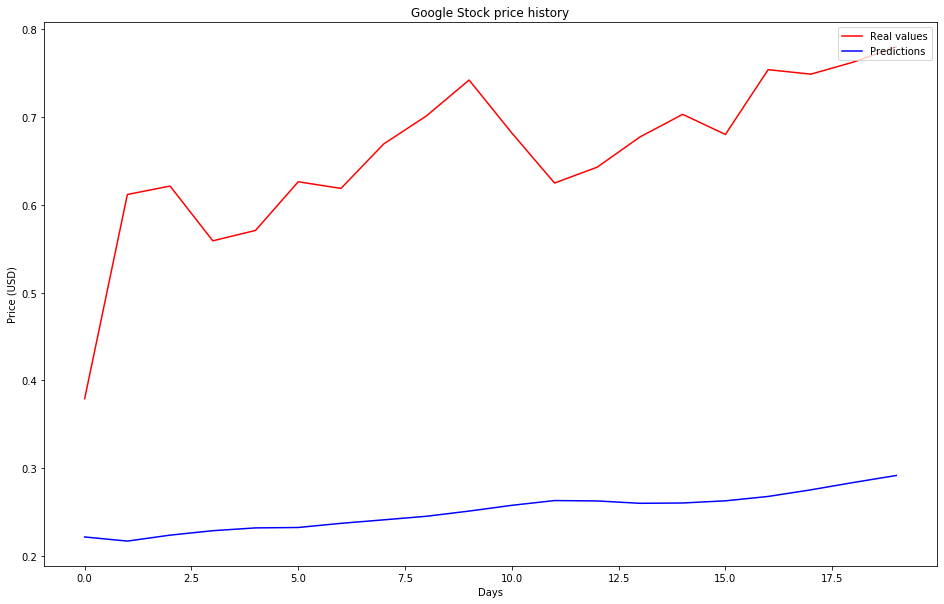

In [54]:
real = y_t
plt.figure(figsize=(16,10))
plt.plot(real, 'r')
plt.plot(pred, 'b')
plt.title('Google Stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(["Real values", "Predictions"], loc='upper right')
plt.show()

In [58]:
y = (y_t * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3] 

In [59]:
y

array([18.50328088, 29.58404166, 30.04105291, 27.07041193, 27.63461908,
       30.27563728, 29.91265234, 32.32414665, 33.84687154, 35.79325783,
       32.92070388, 30.20586429, 31.06834388, 32.7063491 , 33.93181364,
       32.84183436, 36.35645288, 36.11277197, 36.76898122, 37.59101395])